In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importo los diferentes csv donde está la información de las peliculas

In [2]:
df = pd.read_csv(r"..\data\raw\fichas_peliculas\peliculas_001.csv", encoding="utf16",index_col=0).iloc[:,1:]

dfs_to_concat = []
for i in range(2,10):

    
    df_peliculas = pd.read_csv(rf"..\data\raw\fichas_peliculas\peliculas_00{i}.csv", encoding="utf16", index_col=0)
    dfs_to_concat.append(df_peliculas)
df_raw = pd.concat([df] + dfs_to_concat)
df = df_raw
df.head()

,titulo_castellano,titulo_original,year,duracion,pais,director,guion,musica,fotografia,genero,actores,tags,votos,reviews,puntuacion
0,El padrino,The Godfather,1972,175,Estados Unidos,Francis Ford Coppola,Francis Ford Coppola,Nino Rota,Gordon Willis,Drama,"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Drama', 'Mafia', 'Crimen', 'Años 40', 'Años ...",174004,667.0,"9,0"
1,El padrino. Parte II,The Godfather Part IIaka,1974,200,Estados Unidos,Francis Ford Coppola,Francis Ford Coppola,Nino Rota,Gordon Willis,Drama,"['Al Pacino', 'Robert De Niro', 'Diane Keaton'...","['Drama', 'Mafia', 'Crimen', 'Familia', 'Años ...",138820,280.0,"8,9"
2,Doce hombres sin piedad,12 Angry Menaka,1957,95,Estados Unidos,Sidney Lumet,Reginald Rose,Kenyon Hopkins,Boris Kaufman,Drama,"['Henry Fonda', 'Lee J. Cobb', 'Jack Warden', ...","['Drama', 'Intriga', 'Drama judicial / Abogado...",70214,347.0,"8,7"
3,La lista de Schindler,Schindler's List,1993,195,Estados Unidos,Steven Spielberg,Steven Zaillian,John Williams,Janusz Kaminski,Drama,"['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...","['Drama', 'Nazismo', 'Holocausto', 'Basado en ...",174328,419.0,"8,6"
4,Testigo de cargo,Witness for the Prosecution,1957,114,Estados Unidos,Billy Wilder,Billy Wilder,Matty Malneck,Russell Harlan,Intriga,"['Tyrone Power', 'Marlene Dietrich', 'Charles ...","['Intriga', 'Drama', 'Drama judicial / Abogado...",44608,234.0,"8,6"


Compruebo los valores únicos de cada columna y el porcentaje con respecto al total

In [3]:
for key, value in df.items():
    print(key, "|", len(df[key].unique()), "únicos | ", round(((len(df[key].unique()))/ df.shape[0])*100, 2),"%")

titulo_castellano | 10044 únicos |  97.25 %
titulo_original | 10183 únicos |  98.6 %
year | 109 únicos |  1.06 %
duracion | 172 únicos |  1.67 %
pais | 96 únicos |  0.93 %
director | 4287 únicos |  41.51 %
guion | 5706 únicos |  55.25 %
musica | 3630 únicos |  35.15 %
fotografia | 3314 únicos |  32.09 %
genero | 15 únicos |  0.15 %
actores | 10316 únicos |  99.88 %
tags | 7884 únicos |  76.34 %
votos | 6029 únicos |  58.38 %
reviews | 412 únicos |  3.99 %
puntuacion | 50 únicos |  0.48 %


Como los registros en los csv están ordenados por la columna puntuación, los desordeno

In [4]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,titulo_castellano,titulo_original,year,duracion,pais,director,guion,musica,fotografia,genero,actores,tags,votos,reviews,puntuacion
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,Jack Smight,William Goldman,Johnny Mandel,Conrad L. Hall,Intriga,"['Paul Newman', 'Lauren Bacall', 'Julie Harris...","['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",3634,30.0,"6,7"
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,Tim Burton,William Broyles Jr.,Danny Elfman,Philippe Rousselot,Ciencia ficción,"['Mark Wahlberg', 'Helena Bonham Carter', 'Tim...","['Ciencia ficción', 'Fantástico', 'Aventuras',...",49070,108.0,"5,1"
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Michael Caton-Jones,David Wolstencroft,Dario Marianelli,Ivan Strasburg,Drama,"['John Hurt', 'Hugh Dancy', 'Dominique Horwitz...","['Drama', 'Años 90', 'África', 'Basado en hech...",2045,20.0,"7,0"
3,Camino del sur,Goin' South,1978,109,Estados Unidos,Jack Nicholson,John Herman Shaner,Van Dyke Parks,Néstor Almendros,Western,"['Jack Nicholson', 'Mary Steenburgen', 'Danny ...","['Western', 'Comedia']",711,3.0,"5,5"
4,Koko-di Koko-da,Koko-di Koko-da,2019,86,Suecia,Johannes Nyholm,Johannes Nyholm,Simon Ohlsson,Johan Lundborg,Drama,"['Leif Edlund', 'Peter Belli', 'Ylva Gallon', ...","['Drama', 'Fantástico', 'Terror', 'Bucles temp...",639,7.0,"5,0"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10328 entries, 0 to 10327
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titulo_castellano  10328 non-null  object 
 1   titulo_original    10328 non-null  object 
 2   year               10328 non-null  int64  
 3   duracion           10328 non-null  int64  
 4   pais               10328 non-null  object 
 5   director           10328 non-null  object 
 6   guion              10328 non-null  object 
 7   musica             10328 non-null  object 
 8   fotografia         10328 non-null  object 
 9   genero             10328 non-null  object 
 10  actores            10328 non-null  object 
 11  tags               10328 non-null  object 
 12  votos              10328 non-null  int64  
 13  reviews            10328 non-null  float64
 14  puntuacion         10328 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 1.2+ MB


Convierto el tipo de dato de la columna puntuacion

In [6]:
df["puntuacion"] = df["puntuacion"].apply(lambda x: x.strip().replace(",", "."))
df["puntuacion"] = df["puntuacion"].astype(float)

Elimino las columnas votos y review ya que presenta información de antemano que no quiero que tenga el algoritmo cuando efectúe las predicciones, renombro la columna titulo_castellano

In [7]:
df.drop(columns=["votos","reviews"], inplace=True)
df.rename(columns={"titulo_castellano":"pelicula"}, inplace = True)

In [8]:
df.head()

,pelicula,titulo_original,year,duracion,pais,director,guion,musica,fotografia,genero,actores,tags,puntuacion
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,Jack Smight,William Goldman,Johnny Mandel,Conrad L. Hall,Intriga,"['Paul Newman', 'Lauren Bacall', 'Julie Harris...","['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,Tim Burton,William Broyles Jr.,Danny Elfman,Philippe Rousselot,Ciencia ficción,"['Mark Wahlberg', 'Helena Bonham Carter', 'Tim...","['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Michael Caton-Jones,David Wolstencroft,Dario Marianelli,Ivan Strasburg,Drama,"['John Hurt', 'Hugh Dancy', 'Dominique Horwitz...","['Drama', 'Años 90', 'África', 'Basado en hech...",7.0
3,Camino del sur,Goin' South,1978,109,Estados Unidos,Jack Nicholson,John Herman Shaner,Van Dyke Parks,Néstor Almendros,Western,"['Jack Nicholson', 'Mary Steenburgen', 'Danny ...","['Western', 'Comedia']",5.5
4,Koko-di Koko-da,Koko-di Koko-da,2019,86,Suecia,Johannes Nyholm,Johannes Nyholm,Simon Ohlsson,Johan Lundborg,Drama,"['Leif Edlund', 'Peter Belli', 'Ylva Gallon', ...","['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0


In [9]:
df_otros_premios_peliculas = pd.read_csv("..\data\processed\otros_premios_peliculas.csv", encoding="latin1", sep=";", index_col=0).iloc[:,:-1]
df_otros_premios_peliculas["pelicula"] = df_otros_premios_peliculas["pelicula"].astype(str)
df_otros_premios_peliculas["pelicula"] = df_otros_premios_peliculas["pelicula"].apply(lambda x: x.strip())
df_otros_premios_peliculas.head()

,festival,categoria,año,premiado_a,pelicula
id,,,,,
0,Festival de Cannes,Gran Premio del Jurado:,2023,Mati Diop,Stars at Noon
1,Festival de Cannes,Mejor dirección:,2023,Park Chan-wook,Decision to Leave
2,Festival de Cannes,Mejor dirección:,2022,Leos Carax,Annette
3,Festival de Cannes,Mejor dirección:,2021,"Jean-Pierre Dardenne, Luc Dardenne",El joven Ahmed
4,Festival de Cannes,Mejor dirección:,2020,Pawel Pawlikowski,Cold War


In [10]:
df_otros_premios_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12405 entries, 0 to 12404
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   festival    12405 non-null  object
 1   categoria   12405 non-null  object
 2   año         12405 non-null  int64 
 3   premiado_a  12405 non-null  object
 4   pelicula    12405 non-null  object
dtypes: int64(1), object(4)
memory usage: 581.5+ KB


Obtengo todos los premios de todas las categorías asociadas al resto de participantes en una película (guión, interpretación, fotografía, etc...) de todos los festivales de cine

In [11]:
df_premios_a_peliculas_otros = pd.DataFrame(df_otros_premios_peliculas[["pelicula"]].value_counts(),columns=["premios"]).reset_index()
df_premios_a_peliculas_otros["pelicula"] = df_premios_a_peliculas_otros["pelicula"].apply(lambda x: x.split(",")[0])

Elimino registros del dataframe que corresponden a series de TV

In [12]:
df_premios_a_peliculas_otros_sin_TV = df_premios_a_peliculas_otros.drop(df_premios_a_peliculas_otros[df_premios_a_peliculas_otros["pelicula"].str.contains("(Serie de TV)")].index)
df_premios_a_peliculas_otros_sin_TV.head()

,pelicula,premios
2,El último emperador,21
5,La ciudad de las estrellas (La La Land),20
6,The Artist,20
8,El laberinto del fauno,20
12,Slumdog Millionaire,18


Obtengo todos los premios de todas las categorías asociadas a películas de todos los festivales de cine

In [13]:
df_premios_peliculas = pd.read_csv("..\data\processed\premios_peliculas.csv", encoding="latin1", sep=";", index_col=0)
df_premios_peliculas["premiado_a"] = df_premios_peliculas["premiado_a"].astype(str)
df_premios_peliculas["premiado_a"] = df_premios_peliculas["premiado_a"].apply(lambda x: x.strip())
df_premios_peliculas.head()

,festival,categoria,año,premiado_a,director
id,,,,,
0,Festival de Cannes,Palma de Oro: Mejor película:,2023,El triángulo de la tristeza,Ruben Östlund
1,Festival de Cannes,Palma de Oro: Mejor película:,2022,Titane,Harris Dickinson
2,Festival de Cannes,Palma de Oro: Mejor película:,2021,Parásitos,Charlbi Dean
3,Festival de Cannes,Palma de Oro: Mejor película:,2020,Un asunto de familia,Zlatko Buric
4,Festival de Cannes,Palma de Oro: Mejor película:,2019,The Square,Julia Ducournau


In [14]:
df_premios_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3647 entries, 0 to 3646
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   festival    3647 non-null   object
 1   categoria   3647 non-null   object
 2   año         3647 non-null   int64 
 3   premiado_a  3647 non-null   object
 4   director    3647 non-null   object
dtypes: int64(1), object(4)
memory usage: 171.0+ KB


In [15]:
df_premios_a_peliculas = pd.DataFrame(df_premios_peliculas[["premiado_a"]].value_counts(),columns=["premios"]).reset_index()
df_premios_a_peliculas.rename(columns={"premiado_a":"pelicula"}, inplace = True)
df_premios_a_peliculas["pelicula"] = df_premios_a_peliculas["pelicula"].apply(lambda x: x.split(",")[0])
df_premios_a_peliculas.head()

,pelicula,premios
0,Nomadland,18
1,Slumdog Millionaire,17
2,Brokeback Mountain (En terreno vedado),16
3,En tierra hostil,16
4,The Artist,15


Uno ambos dataframes (los asoaciados a la película y los asociados a distintos premios de personal que trabaja en la película)

In [16]:
df_premios_total_peliculas = df_premios_a_peliculas_otros_sin_TV.merge(df_premios_a_peliculas, on='pelicula', how='left')
df_premios_total_peliculas.head()

,pelicula,premios_x,premios_y
0,El último emperador,21,7.0
1,La ciudad de las estrellas (La La Land),20,9.0
2,The Artist,20,15.0
3,El laberinto del fauno,20,2.0
4,Slumdog Millionaire,18,17.0


Hago unas modificaciones (completar los NaN) para sumar ambas columnas de premios y ordenar por la columna de premios

In [17]:
df_premios_total_peliculas.fillna(0, inplace= True)
df_premios_total_peliculas["premios_y"] = df_premios_total_peliculas["premios_y"].astype(int)

In [18]:
df_premios_total_peliculas["premios"] = df_premios_total_peliculas["premios_x"] + df_premios_total_peliculas["premios_y"]

In [19]:
df_premios_total_peliculas.drop(columns=["premios_x", "premios_y"], inplace= True)

In [20]:
df_premios_total_peliculas = df_premios_total_peliculas.sort_values(by= "premios", ascending= False)
df_premios_total_peliculas.head()

,pelicula,premios
2,The Artist,35
4,Slumdog Millionaire,35
5,Roma,32
1,La ciudad de las estrellas (La La Land),29
19,Brokeback Mountain (En terreno vedado),29


Añado columna al dataframe de las peliculas para indicar los premios que ha obtenido la película

In [21]:
df_scaled = df.merge(df_premios_total_peliculas, on='pelicula', how='left')
df_scaled.rename(columns={"premios":"total_premios"}, inplace= True)
df_scaled["total_premios"] = df_scaled["total_premios"].fillna(0)
df_scaled["total_premios"] = df_scaled["total_premios"].astype(int)
df_scaled.head()

,pelicula,titulo_original,year,duracion,pais,director,guion,musica,fotografia,genero,actores,tags,puntuacion,total_premios
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,Jack Smight,William Goldman,Johnny Mandel,Conrad L. Hall,Intriga,"['Paul Newman', 'Lauren Bacall', 'Julie Harris...","['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,Tim Burton,William Broyles Jr.,Danny Elfman,Philippe Rousselot,Ciencia ficción,"['Mark Wahlberg', 'Helena Bonham Carter', 'Tim...","['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Michael Caton-Jones,David Wolstencroft,Dario Marianelli,Ivan Strasburg,Drama,"['John Hurt', 'Hugh Dancy', 'Dominique Horwitz...","['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0
3,Camino del sur,Goin' South,1978,109,Estados Unidos,Jack Nicholson,John Herman Shaner,Van Dyke Parks,Néstor Almendros,Western,"['Jack Nicholson', 'Mary Steenburgen', 'Danny ...","['Western', 'Comedia']",5.5,0
4,Koko-di Koko-da,Koko-di Koko-da,2019,86,Suecia,Johannes Nyholm,Johannes Nyholm,Simon Ohlsson,Johan Lundborg,Drama,"['Leif Edlund', 'Peter Belli', 'Ylva Gallon', ...","['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0,0


Los premios Razzie otorgan galardones a las peores películas, añado una  ueva columna al dataframe para que penalice dichas peliculas

In [22]:
df_razzies_premios = pd.read_csv("..\data\processed\premios_razzies.csv", encoding="latin1", sep=";", index_col=0)
df_razzies_premios = pd.DataFrame(df_razzies_premios[["pelicula"]].value_counts(),columns=["premios"]).reset_index()
df_razzies_premios.rename(columns={"premiado_a":"pelicula"}, inplace = True)
df_razzies_premios["pelicula"] = df_razzies_premios["pelicula"].apply(lambda x: x.split(",")[0].strip())
df_razzies_premios.head()

,pelicula,premios
0,Jack y su gemela (Jack y Jill),16
1,Campo de batalla: La Tierra,11
2,La saga Crepúsculo: Amanecer - Parte 2,10
3,Cats,9
4,Una relación peligrosa (Gigli),9


Añado columna al dataframe de las peliculas la columna razzie

In [23]:
df_scaled = df_scaled.merge(df_razzies_premios, on='pelicula', how='left')
df_scaled.rename(columns={"premios":"razzie"}, inplace= True)
df_scaled["razzie"] = df_scaled["razzie"].fillna(0)
df_scaled["razzie"] = df_scaled["razzie"].astype(int)
df_scaled.head()

,pelicula,titulo_original,year,duracion,pais,director,guion,musica,fotografia,genero,actores,tags,puntuacion,total_premios,razzie
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,Jack Smight,William Goldman,Johnny Mandel,Conrad L. Hall,Intriga,"['Paul Newman', 'Lauren Bacall', 'Julie Harris...","['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0,0
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,Tim Burton,William Broyles Jr.,Danny Elfman,Philippe Rousselot,Ciencia ficción,"['Mark Wahlberg', 'Helena Bonham Carter', 'Tim...","['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1,2
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Michael Caton-Jones,David Wolstencroft,Dario Marianelli,Ivan Strasburg,Drama,"['John Hurt', 'Hugh Dancy', 'Dominique Horwitz...","['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0
3,Camino del sur,Goin' South,1978,109,Estados Unidos,Jack Nicholson,John Herman Shaner,Van Dyke Parks,Néstor Almendros,Western,"['Jack Nicholson', 'Mary Steenburgen', 'Danny ...","['Western', 'Comedia']",5.5,0,0
4,Koko-di Koko-da,Koko-di Koko-da,2019,86,Suecia,Johannes Nyholm,Johannes Nyholm,Simon Ohlsson,Johan Lundborg,Drama,"['Leif Edlund', 'Peter Belli', 'Ylva Gallon', ...","['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0,0,0


Importo csv con el listado categorías premiadas en mas de 40 festivales de cine y academias cinematográficas

In [24]:
df_premios_historico = pd.read_csv("..\data\processed\premios_todas_categorias_todos_festivales_historico.csv", encoding="latin1", sep=";", index_col=0)
df_premios_historico["premiado_a"] = df_premios_historico["premiado_a"].astype(str)
df_premios_historico["premiado_a"] = df_premios_historico["premiado_a"].apply(lambda x: x.strip())
df_premios_historico.head()

,festival,categoria,año,premiado_a
id,,,,
0,Festival de Cannes,Palma de Oro: Mejor película:,2023,El triángulo de la tristeza
1,Festival de Cannes,Palma de Oro: Mejor película:,2022,Titane
2,Festival de Cannes,Palma de Oro: Mejor película:,2021,Parásitos
3,Festival de Cannes,Palma de Oro: Mejor película:,2020,Un asunto de familia
4,Festival de Cannes,Palma de Oro: Mejor película:,2019,The Square


In [25]:
df_premios_historico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16052 entries, 0 to 16051
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   festival    16052 non-null  object
 1   categoria   16052 non-null  object
 2   año         16052 non-null  int64 
 3   premiado_a  16052 non-null  object
dtypes: int64(1), object(3)
memory usage: 627.0+ KB


In [26]:
len(df_premios_historico["categoria"].unique())

278

In [27]:
len(df_premios_historico["festival"].unique())

47

In [28]:
len(df_premios_historico["premiado_a"].unique())

10380

Los directores mas galardonad@s

In [29]:
df_directores = df_premios_historico[df_premios_historico["categoria"].str.contains("dirección|direccion|director")]
df_directores_premios = pd.DataFrame(df_directores[["premiado_a"]].value_counts(),columns=["premios"]).reset_index()
df_directores_premios.rename(columns={"premiado_a":"director"}, inplace = True)
df_directores_premios["director"] = df_directores_premios["director"].apply(lambda x: x.split(",")[0])
df_scaled["director"] = df_scaled["director"].astype(str)
df_directores_premios.head()

,director,premios
0,Roman Polanski,10
1,Ang Lee,9
2,Alfonso Cuarón,8
3,Mario Monicelli,8
4,Oliver Stone,8


Añado columna al dataframe de las peliculas para sustituir la columna director

In [30]:
df_scaled = df_scaled.merge(df_directores_premios, on='director', how='left')
df_scaled.drop(columns="director", inplace=True)
df_scaled.rename(columns={"premios":"director"}, inplace= True)
df_scaled["director"] = df_scaled["director"].fillna(0)
df_scaled["director"] = df_scaled["director"].astype(int)
df_scaled.head()

,pelicula,titulo_original,year,duracion,pais,guion,musica,fotografia,genero,actores,tags,puntuacion,total_premios,razzie,director
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,William Goldman,Johnny Mandel,Conrad L. Hall,Intriga,"['Paul Newman', 'Lauren Bacall', 'Julie Harris...","['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0,0,0
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,William Broyles Jr.,Danny Elfman,Philippe Rousselot,Ciencia ficción,"['Mark Wahlberg', 'Helena Bonham Carter', 'Tim...","['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1,2,0
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,David Wolstencroft,Dario Marianelli,Ivan Strasburg,Drama,"['John Hurt', 'Hugh Dancy', 'Dominique Horwitz...","['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0,0
3,Camino del sur,Goin' South,1978,109,Estados Unidos,John Herman Shaner,Van Dyke Parks,Néstor Almendros,Western,"['Jack Nicholson', 'Mary Steenburgen', 'Danny ...","['Western', 'Comedia']",5.5,0,0,0
4,Koko-di Koko-da,Koko-di Koko-da,2019,86,Suecia,Johannes Nyholm,Simon Ohlsson,Johan Lundborg,Drama,"['Leif Edlund', 'Peter Belli', 'Ylva Gallon', ...","['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0,0,0,0


Los guionistas mas galardonad@s

In [31]:
df_guion = df_premios_historico[df_premios_historico["categoria"].str.contains("guión|guion|guionista")]
df_guion_premios = pd.DataFrame(df_guion[["premiado_a"]].value_counts(),columns=["premios"]).reset_index()
df_guion_premios.rename(columns={"premiado_a":"guion"}, inplace = True)
df_guion_premios["guion"] = df_guion_premios["guion"].apply(lambda x: x.split(",")[0])
df_guion_premios.head()

,guion,premios
0,Martin McDonagh,9
1,Woody Allen,8
2,Pedro Almodóvar,8
3,Aaron Sorkin,7
4,Quentin Tarantino,6


Añado columna al dataframe de las peliculas para sustituir la columna guionista

In [32]:
df_scaled = df_scaled.merge(df_guion_premios, on='guion', how='left')
df_scaled.drop(columns="guion", inplace=True)
df_scaled.rename(columns={"premios":"guion"}, inplace= True)
df_scaled["guion"] = df_scaled["guion"].fillna(0)
df_scaled["guion"] = df_scaled["guion"].astype(int)
df_scaled.head()

,pelicula,titulo_original,year,duracion,pais,musica,fotografia,genero,actores,tags,puntuacion,total_premios,razzie,director,guion
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,Johnny Mandel,Conrad L. Hall,Intriga,"['Paul Newman', 'Lauren Bacall', 'Julie Harris...","['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0,0,0,3
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,Danny Elfman,Philippe Rousselot,Ciencia ficción,"['Mark Wahlberg', 'Helena Bonham Carter', 'Tim...","['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1,2,0,0
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Dario Marianelli,Ivan Strasburg,Drama,"['John Hurt', 'Hugh Dancy', 'Dominique Horwitz...","['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0,0,0
3,Camino del sur,Goin' South,1978,109,Estados Unidos,Van Dyke Parks,Néstor Almendros,Western,"['Jack Nicholson', 'Mary Steenburgen', 'Danny ...","['Western', 'Comedia']",5.5,0,0,0,0
4,Koko-di Koko-da,Koko-di Koko-da,2019,86,Suecia,Simon Ohlsson,Johan Lundborg,Drama,"['Leif Edlund', 'Peter Belli', 'Ylva Gallon', ...","['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0,0,0,0,1


Los músicos mas galardonad@s

In [33]:
df_musicos = df_premios_historico[df_premios_historico["categoria"].str.contains("música|banda sonora|canción|sonido|cancion|musica")]
df_musicos_premios = pd.DataFrame(df_musicos[["premiado_a"]].value_counts(),columns=["premios"]).reset_index()
df_musicos_premios.rename(columns={"premiado_a":"musica"}, inplace = True)
df_musicos_premios["musica"] = df_musicos_premios["musica"].apply(lambda x: x.split(",")[0])
df_musicos_premios.head()

,musica,premios
0,Ennio Morricone,17
1,Alberto Iglesias,15
2,John Williams,13
3,Alexandre Desplat,13
4,Hans Zimmer,9


Añado columna al dataframe de las peliculas para sustituir la columna música

In [34]:
df_scaled = df_scaled.merge(df_musicos_premios, on='musica', how='left')
df_scaled.drop(columns="musica", inplace=True)
df_scaled.rename(columns={"premios":"musica"}, inplace= True)
df_scaled["musica"] = df_scaled["musica"].fillna(0)
df_scaled["musica"] = df_scaled["musica"].astype(int)
df_scaled

,pelicula,titulo_original,year,duracion,pais,fotografia,genero,actores,tags,puntuacion,total_premios,razzie,director,guion,musica
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,Conrad L. Hall,Intriga,"['Paul Newman', 'Lauren Bacall', 'Julie Harris...","['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0,0,0,3,1
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,Philippe Rousselot,Ciencia ficción,"['Mark Wahlberg', 'Helena Bonham Carter', 'Tim...","['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1,2,0,0,1
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Ivan Strasburg,Drama,"['John Hurt', 'Hugh Dancy', 'Dominique Horwitz...","['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0,0,0,2
3,Camino del sur,Goin' South,1978,109,Estados Unidos,Néstor Almendros,Western,"['Jack Nicholson', 'Mary Steenburgen', 'Danny ...","['Western', 'Comedia']",5.5,0,0,0,0,0
4,Koko-di Koko-da,Koko-di Koko-da,2019,86,Suecia,Johan Lundborg,Drama,"['Leif Edlund', 'Peter Belli', 'Ylva Gallon', ...","['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,Los incorregibles albóndigas,Meatballs,1979,92,Canadá,Donald Wilder,Comedia,"['Bill Murray', 'Harvey Atkin', 'Kate Lynch', ...","['Comedia', 'Comedia juvenil', 'Cine familiar']",4.5,0,0,0,0,3
11742,Somos lo que somos,We Are What We Are,2013,105,Estados Unidos,Ryan Samul,Terror,"['Julia Garner', 'Ambyr Childers', 'Bill Sage'...","['Terror', 'Drama', 'Thriller', 'Crimen', 'Fam...",5.6,0,0,0,0,0
11743,Tetsuo 2: El cuerpo del martillo,Tetsuo II: Body Hammeraka,1992,83,Japón,Shinya Tsukamoto,Terror,"['Tomorô Taguchi', 'Iwata', 'Nobu Kanaoka', 'K...","['Terror', 'Ciencia ficción', 'Fantástico', 'G...",5.0,0,0,0,0,2
11744,Pan (Viaje a Nunca Jamás),Panaka,2015,111,Estados Unidos,John Mathieson,Fantástico,"['Levi Miller', 'Garrett Hedlund', 'Hugh Jackm...","['Fantástico', 'Acción', 'Aventuras', 'Cuentos...",5.0,0,0,0,0,1


Los fotógrafos mas galardonad@s

In [35]:
df_fotografia = df_premios_historico[df_premios_historico["categoria"].str.contains("fotografía|fotografia")]
df_fotografia_premios = pd.DataFrame(df_fotografia[["premiado_a"]].value_counts(),columns=["premios"]).reset_index()
df_fotografia_premios.rename(columns={"premiado_a":"fotografia"}, inplace = True)
df_fotografia_premios["fotografia"] = df_fotografia_premios["fotografia"].apply(lambda x: x.split(",")[0])
df_fotografia_premios.head()

,fotografia,premios
0,Emmanuel Lubezki,11
1,Roger Deakins,10
2,Gabriel Figueroa,8
3,Javier Aguirresarobe,8
4,Luca Bigazzi,8


Añado columna al dataframe de las peliculas para sustituir la columna fotografia

In [36]:
df_scaled = df_scaled.merge(df_fotografia_premios, on='fotografia', how='left')
df_scaled.drop(columns="fotografia", inplace=True)
df_scaled.rename(columns={"premios":"fotografia"}, inplace= True)
df_scaled["fotografia"] = df_scaled["fotografia"].fillna(0)
df_scaled["fotografia"] = df_scaled["fotografia"].astype(int)
df_scaled.head()

,pelicula,titulo_original,year,duracion,pais,genero,actores,tags,puntuacion,total_premios,razzie,director,guion,musica,fotografia
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,Intriga,"['Paul Newman', 'Lauren Bacall', 'Julie Harris...","['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0,0,0,3,1,7
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,Ciencia ficción,"['Mark Wahlberg', 'Helena Bonham Carter', 'Tim...","['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1,2,0,0,1,5
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Drama,"['John Hurt', 'Hugh Dancy', 'Dominique Horwitz...","['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0,0,0,2,2
3,Camino del sur,Goin' South,1978,109,Estados Unidos,Western,"['Jack Nicholson', 'Mary Steenburgen', 'Danny ...","['Western', 'Comedia']",5.5,0,0,0,0,0,2
4,Koko-di Koko-da,Koko-di Koko-da,2019,86,Suecia,Drama,"['Leif Edlund', 'Peter Belli', 'Ylva Gallon', ...","['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0,0,0,0,1,0,0


Los actores/ actrices mas galardonad@s

In [37]:
df_interpretacion = df_premios_historico[df_premios_historico["categoria"].str.contains("actor|actriz|interpretación|actuación|coactuación|intérprete|interprete|interpretacion")]
df_interpretacion_premios = pd.DataFrame(df_interpretacion[["premiado_a"]].value_counts(),columns=["premios"]).reset_index()
df_interpretacion_premios.rename(columns={"premiado_a":"reparto"}, inplace = True)
df_interpretacion_premios["reparto"] = df_interpretacion_premios["reparto"].apply(lambda x: x.split(",")[0])

Creo nuevas columnas en al dataframe a partir de la columna actores (lista con los 5 principales actores)

In [38]:
df_scaled[['reparto_1', 'reparto_2', 'reparto_3', 'reparto_4', 'reparto_5']] = df_scaled['actores'].str.split(", ").apply(lambda x: pd.Series([i.strip("[]' ") for i in x]))

Limpio las columnas creadas para eliminar comillas y Nan

In [39]:
lista_columnas = ['reparto_1', 'reparto_2', 'reparto_3', 'reparto_4', 'reparto_5']

def limpiar_columnas_comillas_nan(df, lista_columnas):
    for columna in lista_columnas:
        df[columna] = df[columna].fillna(0)
        df[columna] = df[columna].astype(str)
        df[columna] = df[columna].apply(lambda x: x.strip('" "'))

limpiar_columnas_comillas_nan(df_scaled, lista_columnas)

Sustituyo columnas de reparto por valores numéricos extraidos de la información de los premios que han recibido los actores

In [40]:
df_scaled = pd.merge(df_scaled, df_interpretacion_premios, how='left', left_on='reparto_1', right_on='reparto')
df_scaled.drop(columns=["reparto_1","reparto"], inplace=True)
df_scaled.rename(columns={"premios":"reparto_1"}, inplace= True)
df_scaled["reparto_1"] = df_scaled["reparto_1"].fillna(0)
df_scaled["reparto_1"] = df_scaled["reparto_1"].astype(int)

In [41]:
df_scaled = pd.merge(df_scaled, df_interpretacion_premios, how='left', left_on='reparto_2', right_on='reparto')
df_scaled.drop(columns=["reparto_2","reparto"], inplace=True)
df_scaled.rename(columns={"premios":"reparto_2"}, inplace= True)
df_scaled["reparto_2"] = df_scaled["reparto_2"].fillna(0)
df_scaled["reparto_2"] = df_scaled["reparto_2"].astype(int)

In [42]:
df_scaled = pd.merge(df_scaled, df_interpretacion_premios, how='left', left_on='reparto_3', right_on='reparto')
df_scaled.drop(columns=["reparto_3","reparto"], inplace=True)
df_scaled.rename(columns={"premios":"reparto_3"}, inplace= True)
df_scaled["reparto_3"] = df_scaled["reparto_3"].fillna(0)
df_scaled["reparto_3"] = df_scaled["reparto_3"].astype(int)

In [43]:
df_scaled = pd.merge(df_scaled, df_interpretacion_premios, how='left', left_on='reparto_4', right_on='reparto')
df_scaled.drop(columns=["reparto_4","reparto"], inplace=True)
df_scaled.rename(columns={"premios":"reparto_4"}, inplace= True)
df_scaled["reparto_4"] = df_scaled["reparto_4"].fillna(0)
df_scaled["reparto_4"] = df_scaled["reparto_4"].astype(int)

In [44]:
df_scaled = pd.merge(df_scaled, df_interpretacion_premios, how='left', left_on='reparto_5', right_on='reparto')
df_scaled.drop(columns=["reparto_5","reparto"], inplace=True)
df_scaled.rename(columns={"premios":"reparto_5"}, inplace= True)
df_scaled["reparto_5"] = df_scaled["reparto_5"].fillna(0)
df_scaled["reparto_5"] = df_scaled["reparto_5"].astype(int)

In [45]:
df_scaled.drop(columns="actores", inplace= True)

Visualizo las columnas de reparto pasadas a numéricas

In [46]:
df_scaled.head()

,pelicula,titulo_original,year,duracion,pais,genero,tags,puntuacion,total_premios,razzie,director,guion,musica,fotografia,reparto_1,reparto_2,reparto_3,reparto_4,reparto_5
0,"Harper, investigador privado",Harper,1966,121,Estados Unidos,Intriga,"['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0,0,0,3,1,7,3,1,0,3,0
1,El planeta de los simios,Planet of the Apes,2001,120,Estados Unidos,Ciencia ficción,"['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1,2,0,0,1,5,0,1,1,1,4
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Drama,"['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0,0,0,2,2,3,0,0,0,0
3,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),2005,115,Reino Unido,Drama,"['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0,0,0,2,2,1,0,0,0,0
4,Camino del sur,Goin' South,1978,109,Estados Unidos,Western,"['Western', 'Comedia']",5.5,0,0,0,0,0,2,15,2,2,3,0


Corrijo errores en algunas columnas

In [47]:
df_scaled["titulo_original"] = df_scaled["titulo_original"].apply(lambda x: x.split("aka")[0])

In [48]:
df_scaled.drop_duplicates(subset=['titulo_original'], inplace=True)

Voy a revisar la columna duracion para ver si hay outliers

In [49]:
df_scaled["duracion"].describe()

count    10137.000000
mean       106.367268
std         20.509997
min         52.000000
25%         93.000000
50%        103.000000
75%        115.000000
max        450.000000
Name: duracion, dtype: float64

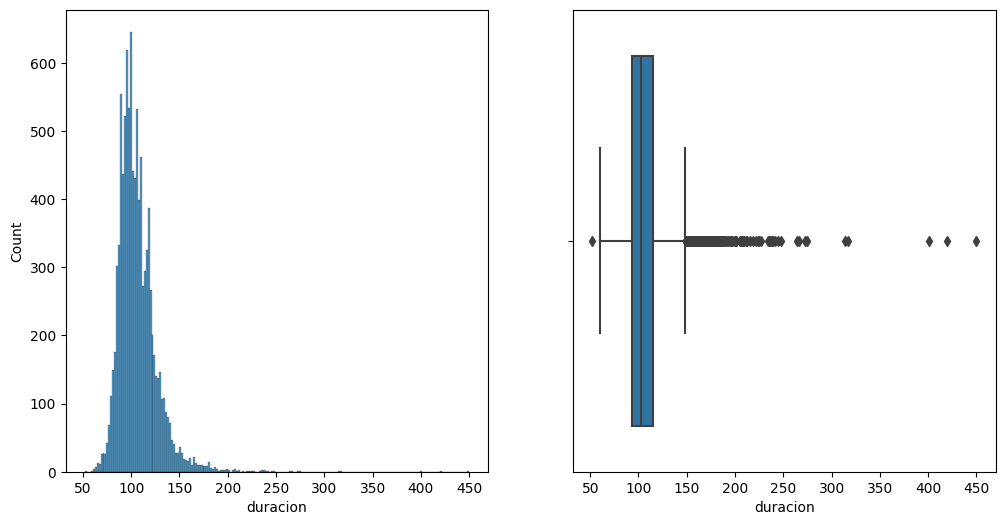

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex = False)

sns.histplot(ax=ax[0], data=df, x=df_scaled["duracion"])
sns.boxplot(ax=ax[1], data=df, x=df_scaled["duracion"])


plt.show()

 Voy a poner un umbral en 250 minutos, las películas que pasen de esa duración las considero outliers y las elimino

In [51]:
len(df_scaled[df_scaled["duracion"]>250])

9

In [52]:
df_scaled.drop(df_scaled[df_scaled["duracion"]>250].index, inplace=True)

Creo una función para discretizar la columna duracion

In [53]:
def categorizar_duracion(duracion):

    if duracion >= 50 and duracion <= 100:
        return 1
    elif duracion > 100 and duracion <= 200:
        return 2
    elif duracion > 200 and duracion <= 250:
        return 3

df_scaled["duracion_type"] = df_scaled["duracion"].apply(lambda x: categorizar_duracion(x))
df_scaled.drop(columns="duracion", inplace=True)
df_scaled.rename(columns={"duracion_type":"duracion"}, inplace= True)

Voy a revisar la columna year para ver si hay outliers

In [54]:
df_scaled["year"].describe()

count    10128.000000
mean      1995.133689
std         23.214238
min       1914.000000
25%       1983.000000
50%       2003.000000
75%       2013.000000
max       2023.000000
Name: year, dtype: float64

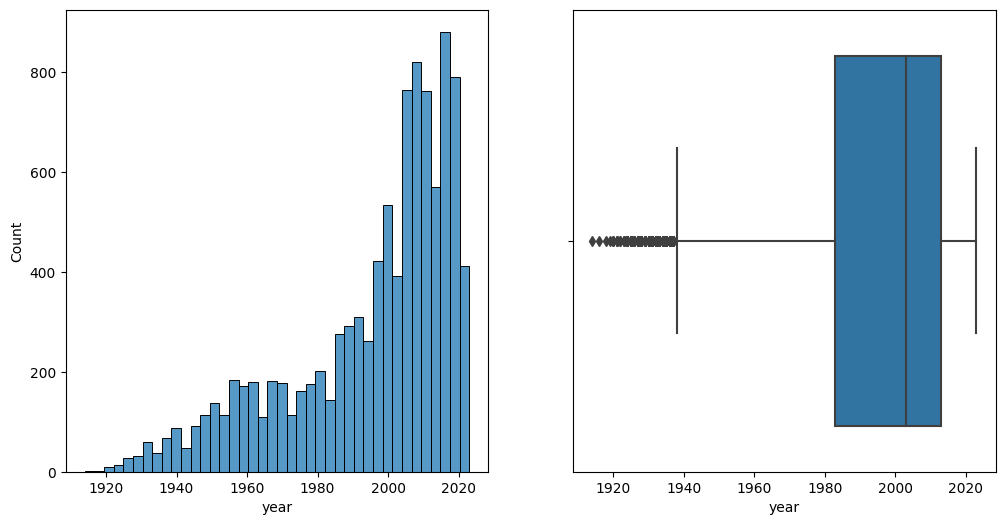

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex = False)

sns.histplot(ax=ax[0], data=df, x=df_scaled["year"])
sns.boxplot(ax=ax[1], data=df, x=df_scaled["year"])

plt.show()

In [57]:
df_scaled["year"].describe()

count    10128.000000
mean      1995.133689
std         23.214238
min       1914.000000
25%       1983.000000
50%       2003.000000
75%       2013.000000
max       2023.000000
Name: year, dtype: float64

Dejaré todos los registros al tratarse de registros representativos, la totalidad. Creo un afunción para discretzar la columna

In [58]:
def categorizar_year(year):
    
    if year >= 1910 and year <= 1932:
        return 1
    elif year > 1932 and year <= 1959:
        return 2
    elif year > 1959 and year <= 1985:
        return 3
    elif year > 1985 and year <= 2023:
        return 4


df_scaled["year_grade"] = df_scaled["year"].apply(lambda x: categorizar_year(x))
df_scaled.drop(columns="year", inplace=True)
df_scaled.rename(columns={"year_grade":"year"}, inplace= True)

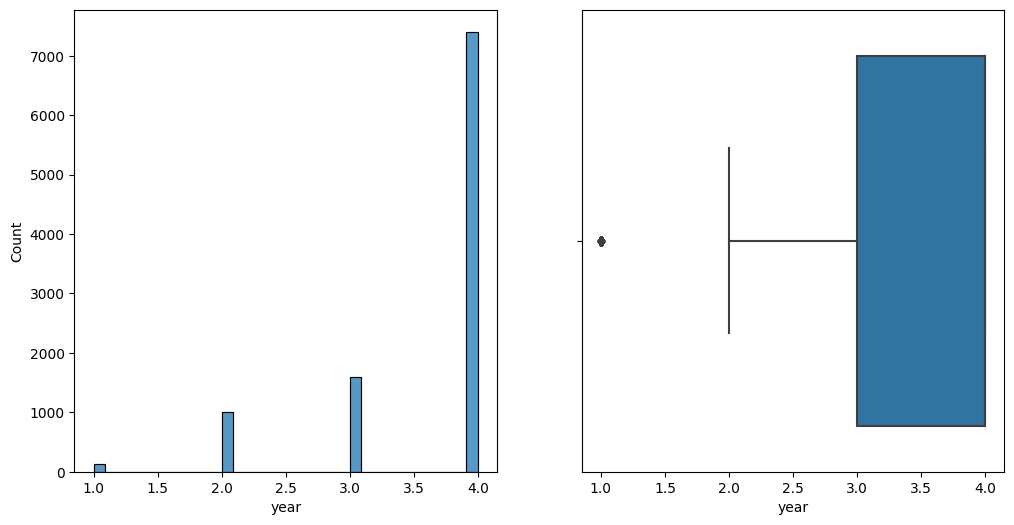

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex = False)

sns.histplot(ax=ax[0], data=df, x=df_scaled["year"])
sns.boxplot(ax=ax[1], data=df, x=df_scaled["year"])

plt.show()

Elimino acentos y dejo en minusculas el contenido de la columna genero

In [60]:
df_scaled["genero"] = df_scaled["genero"].apply(lambda x: x.replace("ó","o").replace("é","e").replace("á","a").lower())

Convierto cada registro único de la columna genero en una nueva columna con get_dummies y concateno al dataframe principal

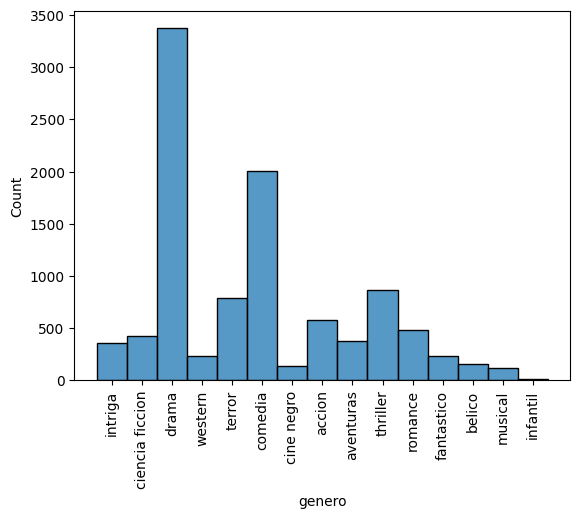

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_scaled["genero"])

plt.xticks(rotation=90)

plt.show()

In [62]:
df_generos = pd.get_dummies(df_scaled["genero"])
df_scaled = pd.concat([df_scaled, df_generos], axis=1)
df_scaled.drop(columns="genero", inplace=True)

In [63]:
df_scaled.head()

,pelicula,titulo_original,pais,tags,puntuacion,total_premios,razzie,director,guion,musica,...,comedia,drama,fantastico,infantil,intriga,musical,romance,terror,thriller,western
0,"Harper, investigador privado",Harper,Estados Unidos,"['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0,0,0,3,1,...,0,0,0,0,1,0,0,0,0,0
1,El planeta de los simios,Planet of the Apes,Estados Unidos,"['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),Reino Unido,"['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,0
4,Camino del sur,Goin' South,Estados Unidos,"['Western', 'Comedia']",5.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Koko-di Koko-da,Koko-di Koko-da,Suecia,"['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [64]:
df_paises = pd.DataFrame(df_scaled["pais"].value_counts().head(10).reset_index())
df_paises.rename(columns={"index":"pais", "pais": "cantidad_peliculas"}, inplace=True)

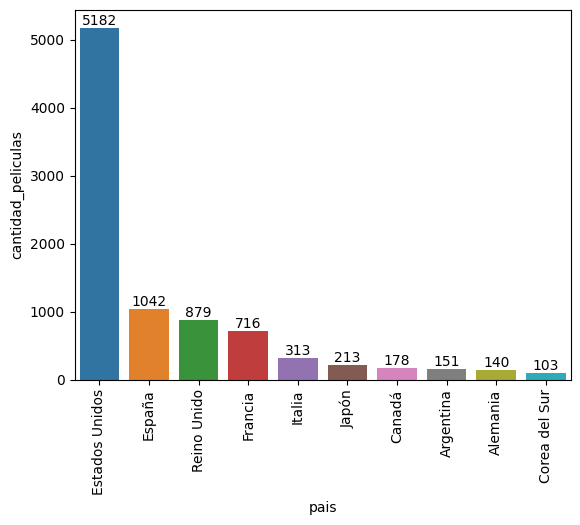

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=df_paises, x=df_paises["pais"], y=df_paises["cantidad_peliculas"])

plt.xticks(rotation=90)

ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge')

plt.show()

Convierto la columna pais en numérica sustituyendo los valores por la frecuencia dentro de la serie

In [66]:
dict_paises = df_scaled["pais"].value_counts().to_dict()
df_scaled["pais_freq"] = df_scaled["pais"].map(dict_paises)
df_scaled.drop(columns="pais", inplace= True)
df_scaled.rename(columns={"pais_freq":"pais"}, inplace= True)
df_scaled.head()

,pelicula,titulo_original,tags,puntuacion,total_premios,razzie,director,guion,musica,fotografia,...,drama,fantastico,infantil,intriga,musical,romance,terror,thriller,western,pais
0,"Harper, investigador privado",Harper,"['Intriga', 'Policíaco', 'Crimen', 'Neo-noir',...",6.7,0,0,0,3,1,7,...,0,0,0,1,0,0,0,0,0,5182
1,El planeta de los simios,Planet of the Apes,"['Ciencia ficción', 'Fantástico', 'Aventuras',...",5.1,1,2,0,0,1,5,...,0,0,0,0,0,0,0,0,0,5182
2,Disparando a perros (Shooting Dogs),Shooting Dogs (Beyond the Gates),"['Drama', 'Años 90', 'África', 'Basado en hech...",7.0,0,0,0,0,2,2,...,1,0,0,0,0,0,0,0,0,879
4,Camino del sur,Goin' South,"['Western', 'Comedia']",5.5,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,5182
5,Koko-di Koko-da,Koko-di Koko-da,"['Drama', 'Fantástico', 'Terror', 'Bucles temp...",5.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,78


Quito columnas tags, pelicula y titulo_original para comenzar a entrenar el modelo de Machine Learning

In [67]:
df_scaled.drop(columns=["tags","pelicula","titulo_original"], inplace=True)

In [68]:
df_scaled.to_csv("..\data\processed\peliculas_analisis_ML.csv")

Visualizo la distribución de la variable objetivo

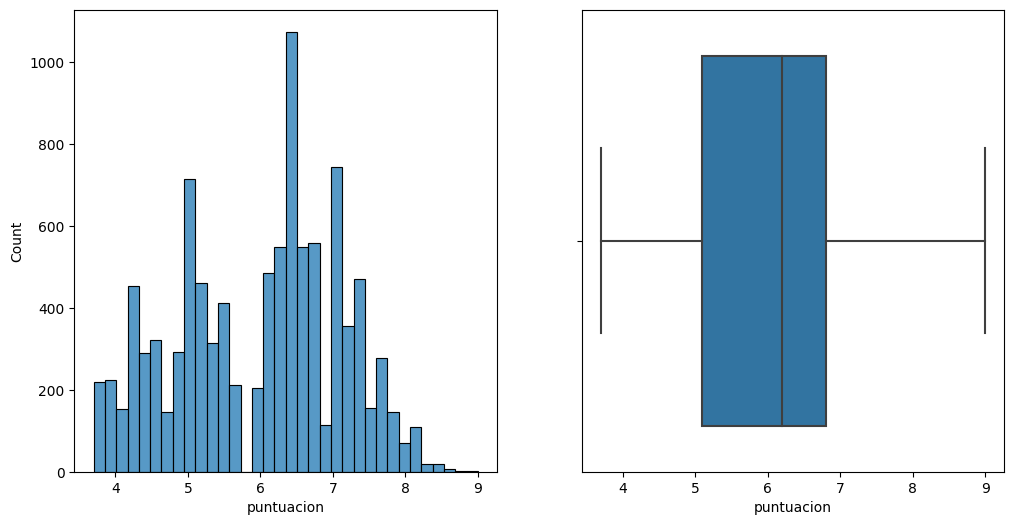

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex = False)

sns.histplot(ax=ax[0], data=df, x=df_scaled["puntuacion"])
sns.boxplot(ax=ax[1], data=df, x=df_scaled["puntuacion"])

plt.show()

Visualizo la relación lineal entre variables

interval columns not set, guessing: ['puntuacion', 'total_premios', 'razzie', 'director', 'guion', 'musica', 'fotografia', 'reparto_1', 'reparto_2', 'reparto_3', 'reparto_4', 'reparto_5', 'duracion', 'year', 'accion', 'aventuras', 'belico', 'ciencia ficcion', 'cine negro', 'comedia', 'drama', 'fantastico', 'infantil', 'intriga', 'musical', 'romance', 'terror', 'thriller', 'western', 'pais']


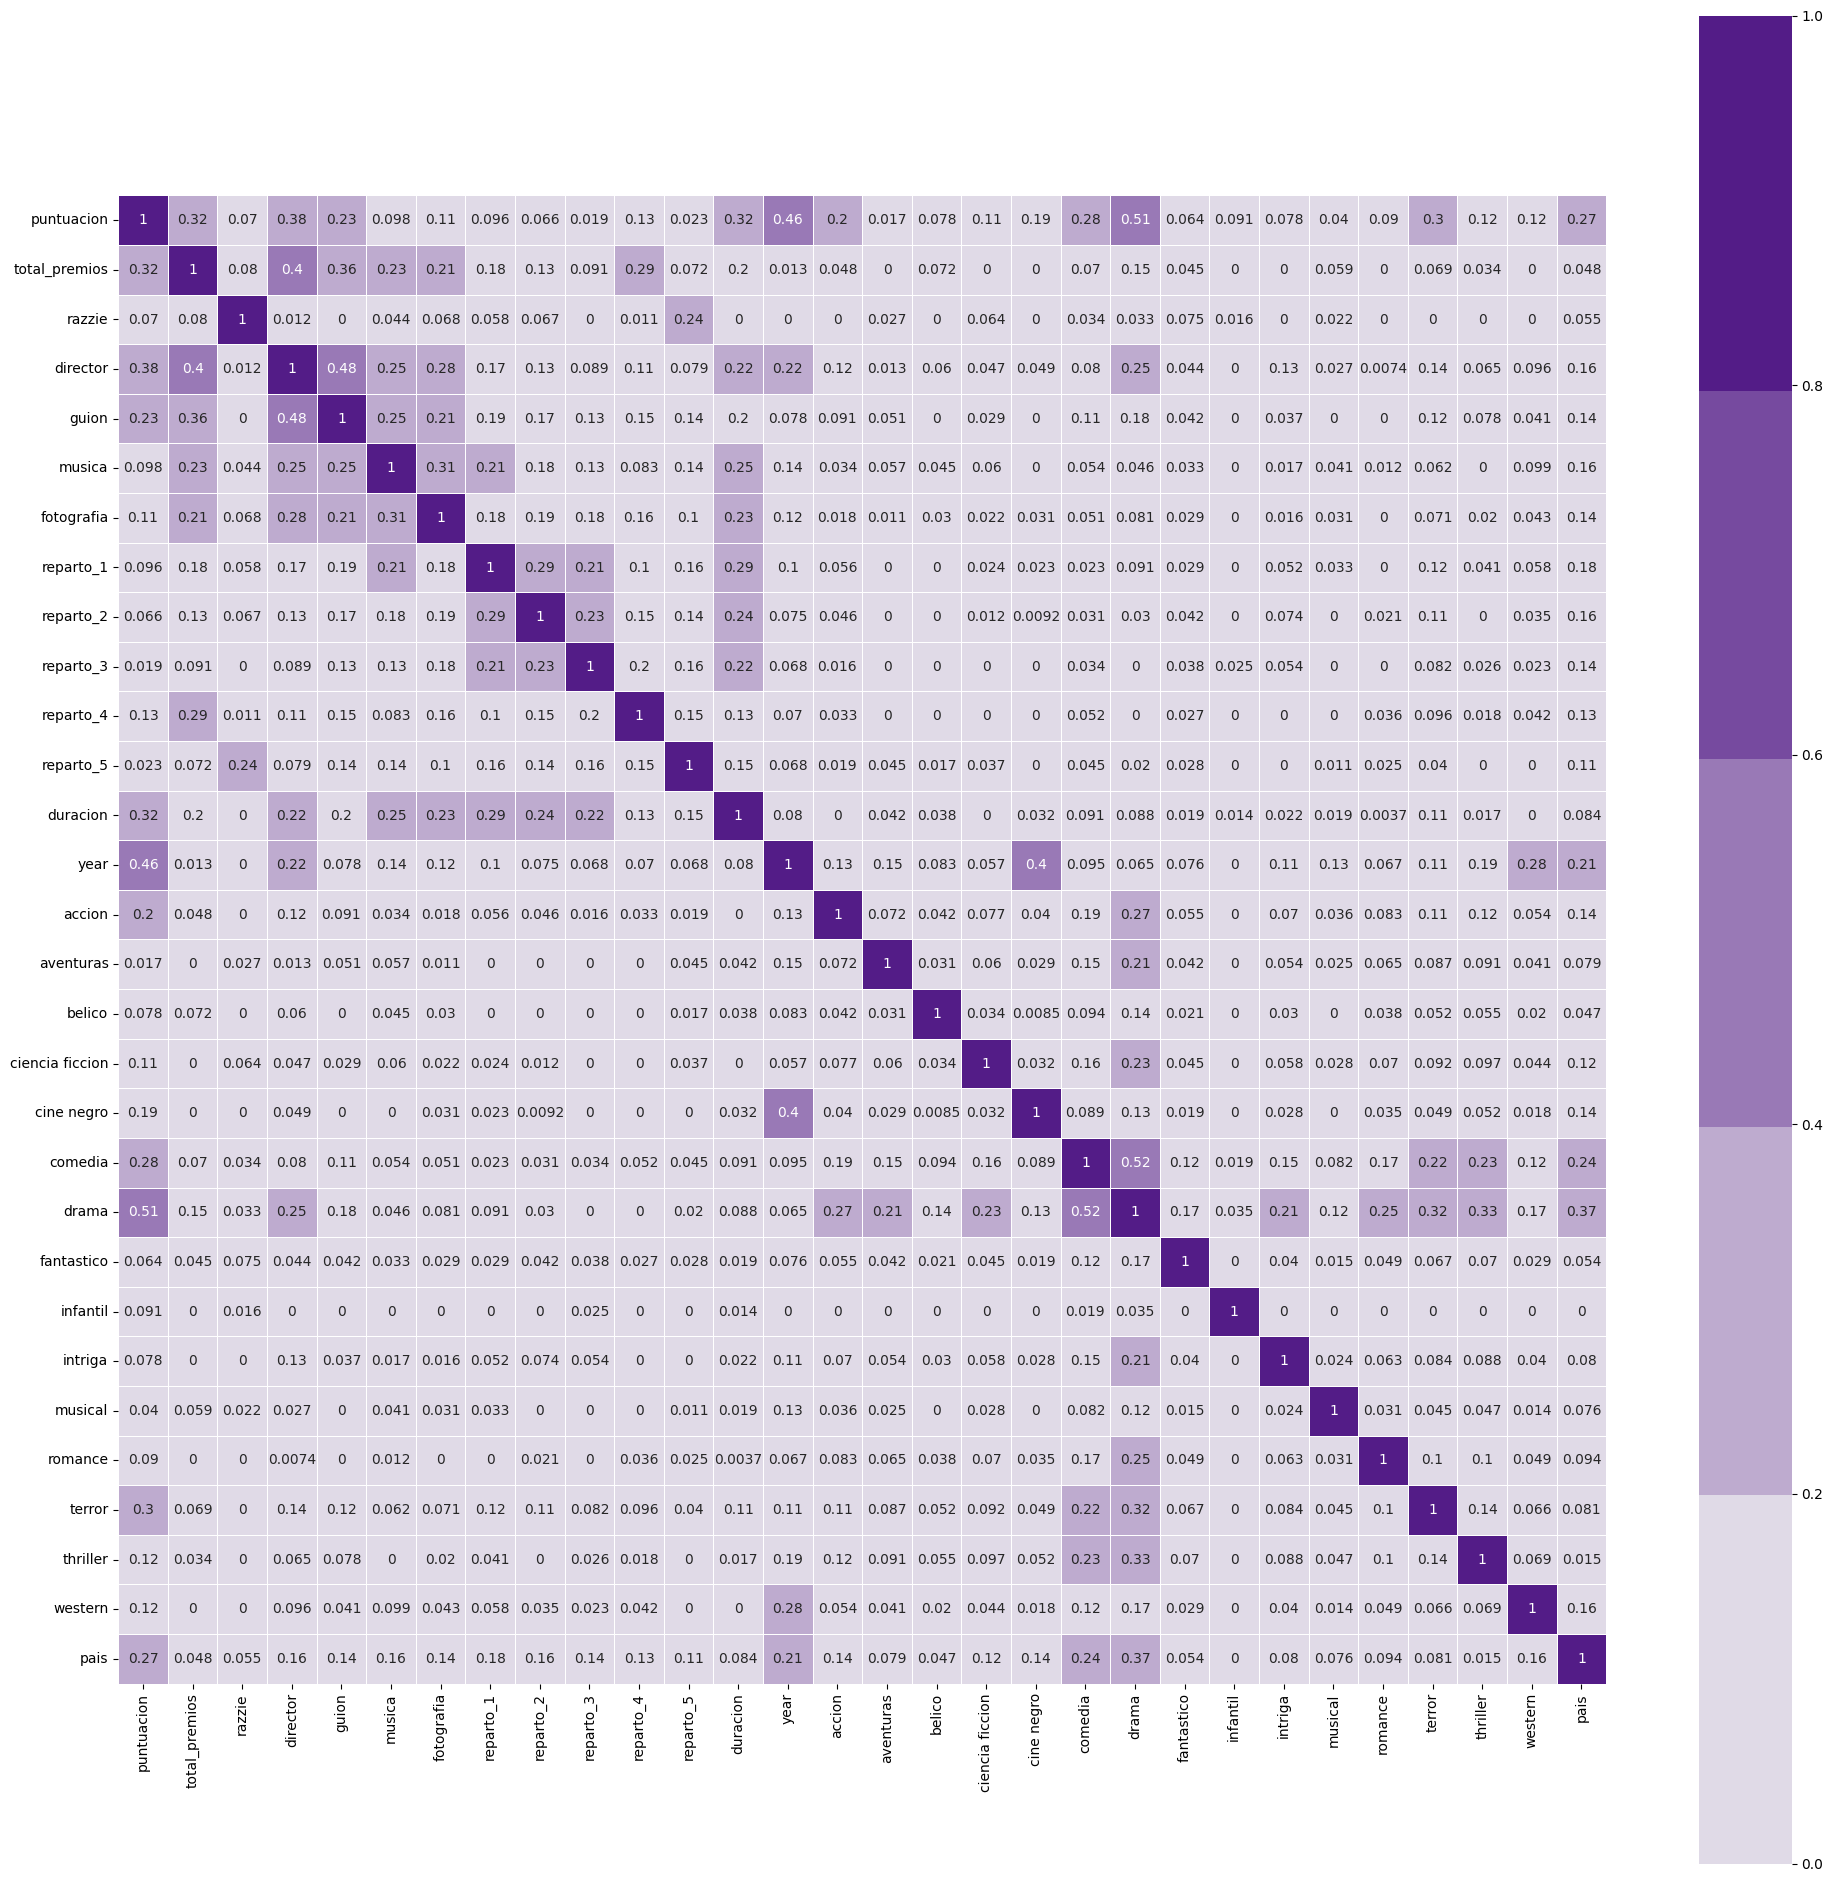

In [70]:
import phik

phik_matrix = df_scaled.phik_matrix()

plt.figure(figsize=(24,24))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

<Axes: >

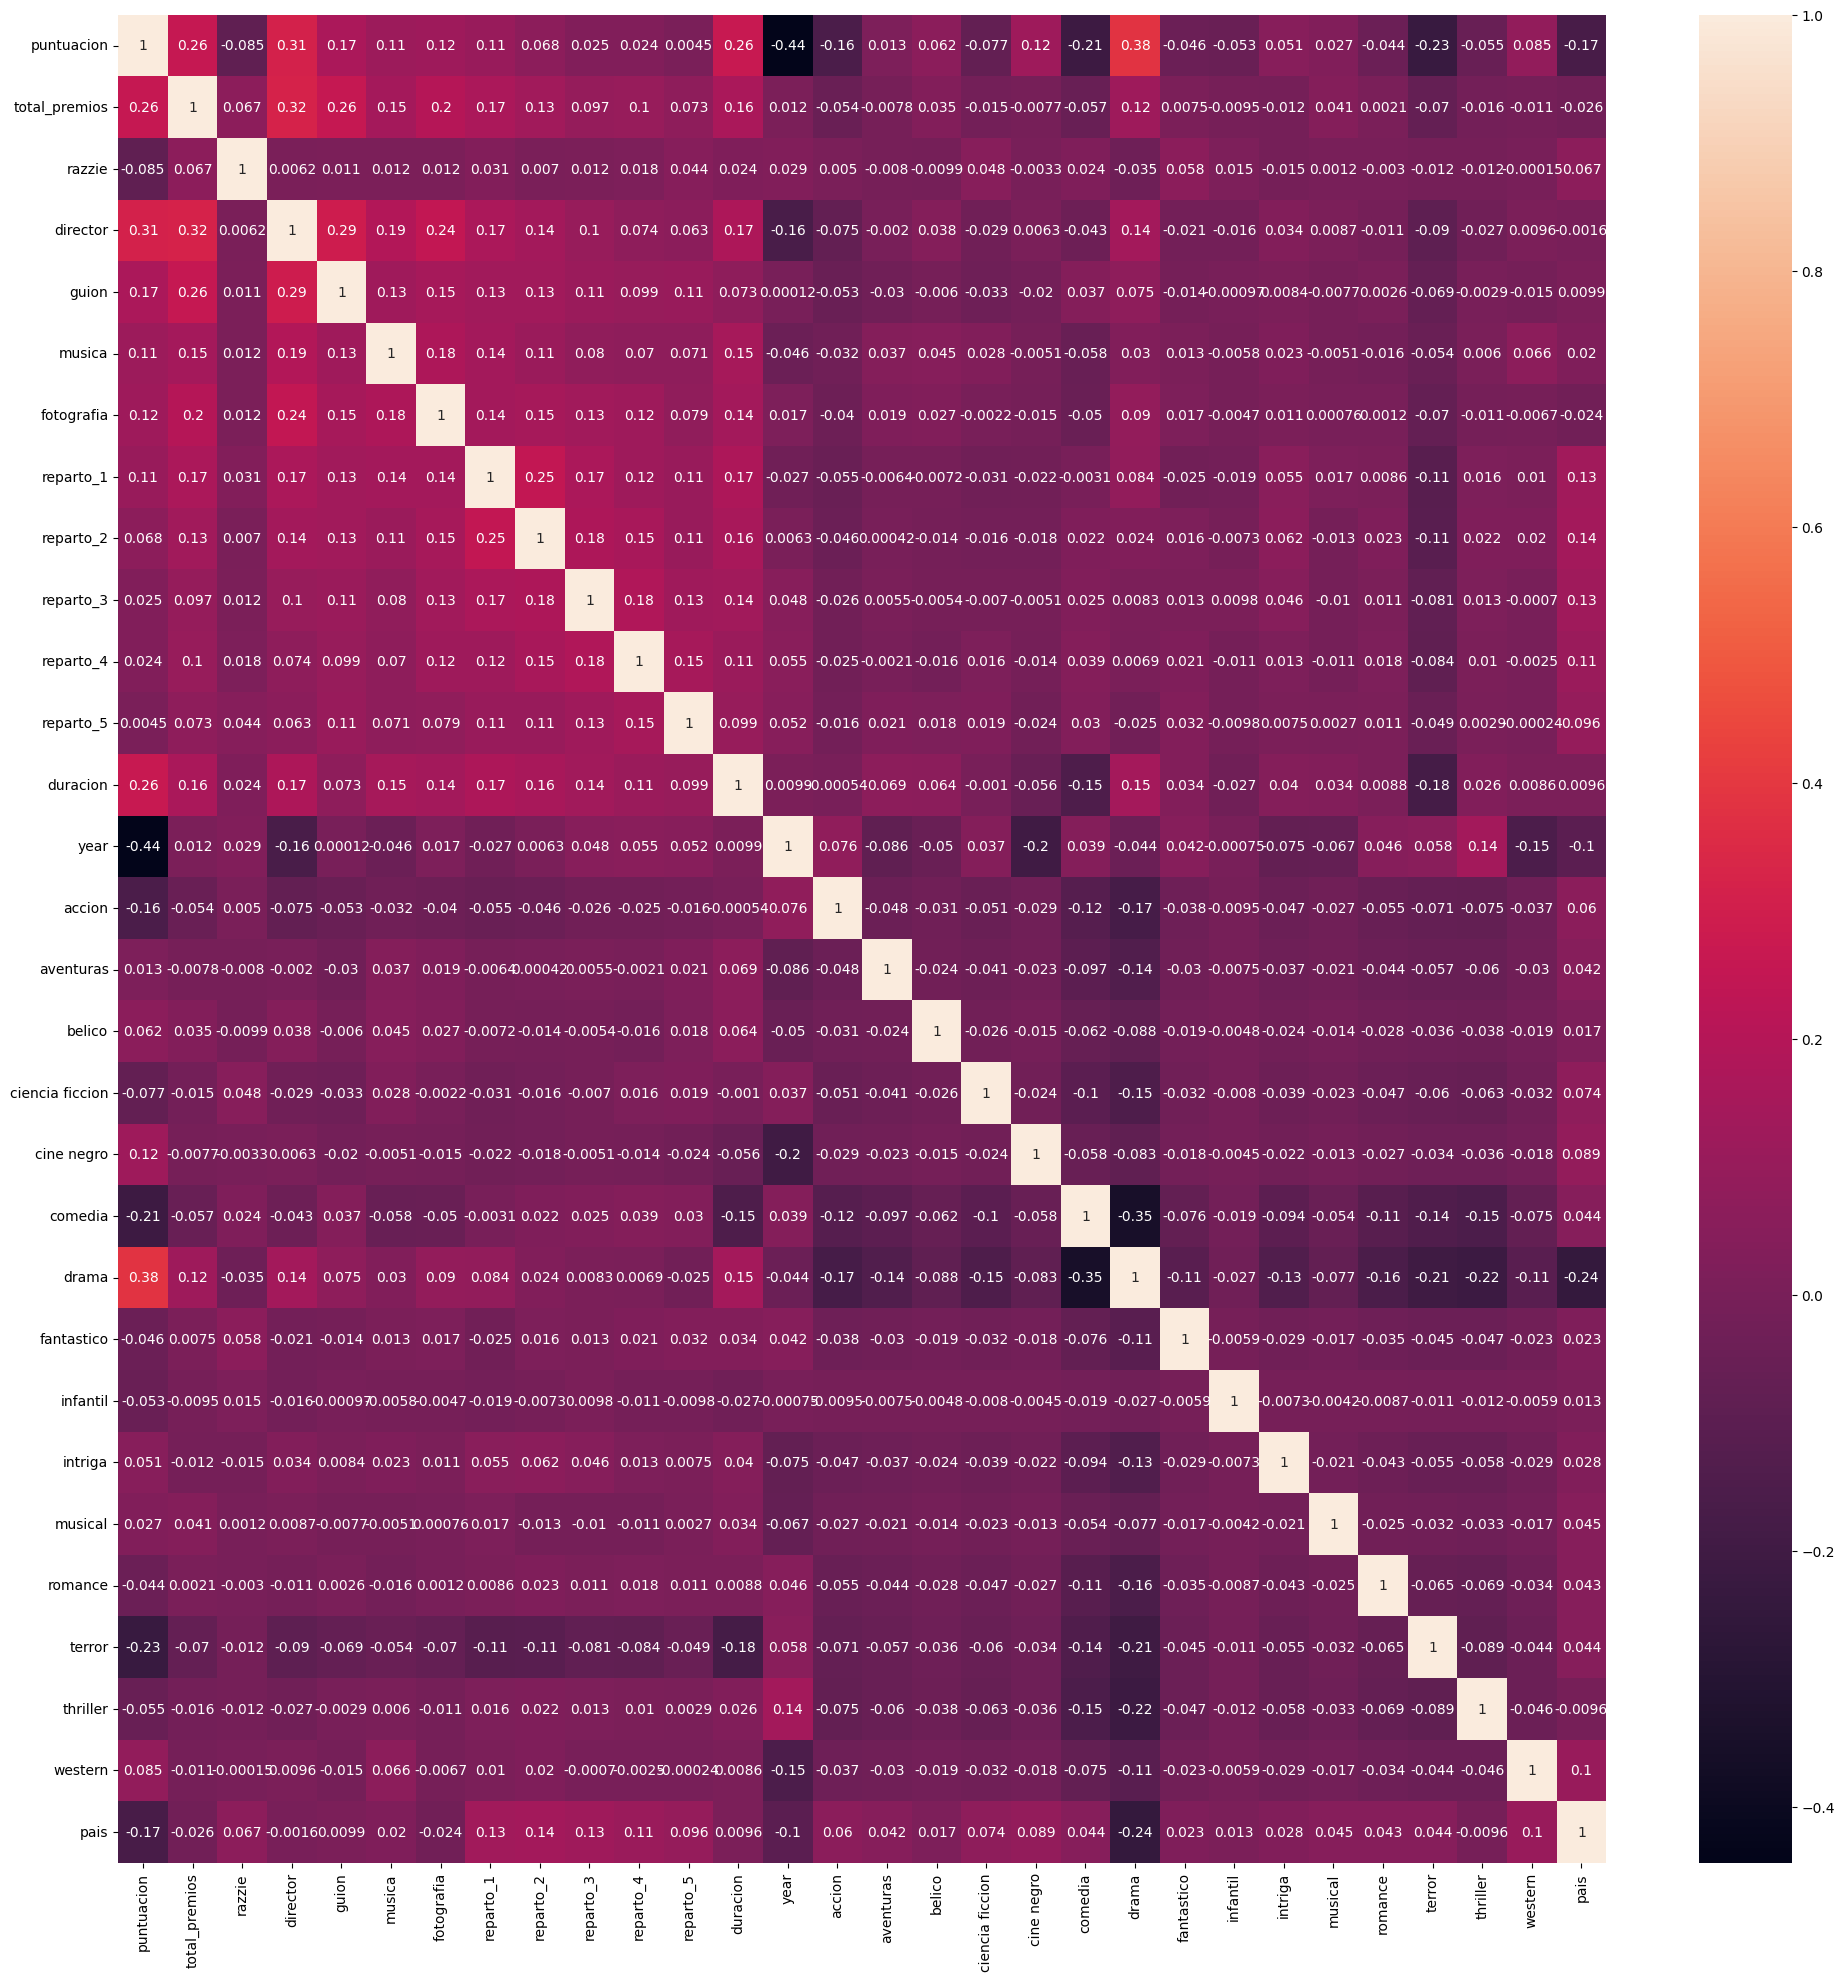

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(df_scaled.corr(), annot=True)

Muestro la cantidad de valores únicos y su porcentaje con respecto del total de cada columna (tras las transformaciones de las columnas categóricas)

In [71]:
for key, value in df_scaled.items():
    print(key, "|", len(df_scaled[key].unique()), "únicos | ", round(((len(df_scaled[key].unique()))/ df_scaled.shape[0])*100, 2),"%")

puntuacion | 50 únicos |  0.49 %
total_premios | 30 únicos |  0.3 %
razzie | 9 únicos |  0.09 %
director | 11 únicos |  0.11 %
guion | 10 únicos |  0.1 %
musica | 12 únicos |  0.12 %
fotografia | 11 únicos |  0.11 %
reparto_1 | 18 únicos |  0.18 %
reparto_2 | 18 únicos |  0.18 %
reparto_3 | 18 únicos |  0.18 %
reparto_4 | 16 únicos |  0.16 %
reparto_5 | 18 únicos |  0.18 %
duracion | 3 únicos |  0.03 %
year | 4 únicos |  0.04 %
accion | 2 únicos |  0.02 %
aventuras | 2 únicos |  0.02 %
belico | 2 únicos |  0.02 %
ciencia ficcion | 2 únicos |  0.02 %
cine negro | 2 únicos |  0.02 %
comedia | 2 únicos |  0.02 %
drama | 2 únicos |  0.02 %
fantastico | 2 únicos |  0.02 %
infantil | 2 únicos |  0.02 %
intriga | 2 únicos |  0.02 %
musical | 2 únicos |  0.02 %
romance | 2 únicos |  0.02 %
terror | 2 únicos |  0.02 %
thriller | 2 únicos |  0.02 %
western | 2 únicos |  0.02 %
pais | 45 únicos |  0.44 %
